<a href="https://colab.research.google.com/github/panzershracker/Probability-theory/blob/master/%D0%9C%D0%B0%D1%82%D1%81%D1%82%D0%B0%D1%82_les07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):**

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

Расчет коэф. регрессии с интерсептом по формуле:

In [0]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = len(X)

In [4]:
b = ((n * sum(X * y)) - sum(X) * sum(y)) / (n * sum(X**2) - (sum(X)**2))

a = y.mean() - b * X.mean()

y_hat = a + b * X

b, a

(2.6205388824027653, 444.17735732435955)

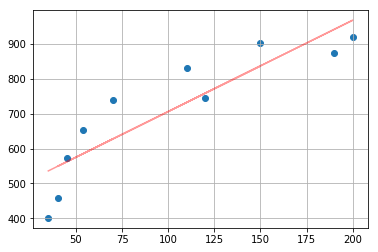

In [5]:
plt.scatter(X, y)

# lin. reg. plot with intercept

plt.plot(X, y_hat, c='r', alpha=0.4)

plt.grid()
plt.show()

Расчет коэф. матричным поиском без интерсепта:

In [6]:
X2 = X.reshape(10, 1)
y2 = y.reshape(10, 1)

X2.shape, y2.shape

((10, 1), (10, 1))

In [7]:
B = np.dot(np.linalg.inv(np.dot(X2.T, X2)), X2.T @ y2)

B

array([[5.88982042]])

In [0]:
Y = (B * X).reshape(10, 1)

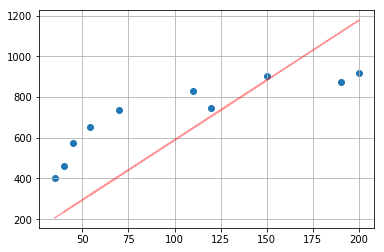

In [9]:
plt.scatter(X, y)

# lin. reg. plot without intercept

plt.plot(X2, Y, c='r', alpha=0.4)

plt.grid()
plt.show()

Расчет коэф. матричным поиском с интерсептом:

In [28]:
X3 = X.reshape(10, 1)
y3 = y.reshape(10, 1)

X3 = np.hstack([np.ones((10,1)), X3])

X3.shape, y3.shape

((10, 2), (10, 1))

In [0]:
y_pred = np.dot(np.linalg.inv(np.dot(X3.T, X3)), X3.T @ y3)

In [41]:
B0 = y_pred[0,0]
B1 = y_pred[1,0]

B0, B1

(444.1773573243595, 2.620538882402766)

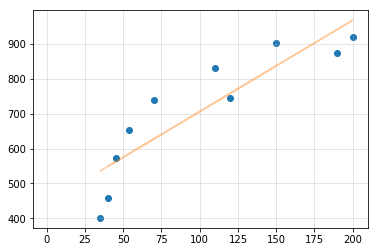

In [46]:
plt.scatter(x, y)

# Plot with intercept. Coefficients B0, B1 matrix searched
plt.plot(X3, B0 + B1 * X3, alpha=0.4)

plt.grid(alpha=0.4)
plt.show()

**Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

In [0]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = len(X)

In [0]:
def mse(B1, x=x, y=y, n=10):
  
  return np.sum((B * x - y)**2) / n

In [0]:
n = 10

alpha = 1e-6

In [13]:
B1 = 0.1

for i in range(1000):
  B1 -= alpha * (2/n) * np.sum((B1 * x - y) * x)
  
  if i % 100 == 0:
    print(f'Iteration = {i}, B1 = {B1}, mse = {mse(B1)}')

Iteration = 0, B1 = 0.25952808, mse = 56516.8584157194
Iteration = 100, B1 = 5.54537842245223, mse = 56516.8584157194
Iteration = 200, B1 = 5.868748638669329, mse = 56516.8584157194
Iteration = 300, B1 = 5.888531320728348, mse = 56516.8584157194
Iteration = 400, B1 = 5.8897415574471985, mse = 56516.8584157194
Iteration = 500, B1 = 5.889815595583751, mse = 56516.8584157194
Iteration = 600, B1 = 5.889820124983314, mse = 56516.8584157194
Iteration = 700, B1 = 5.889820402076462, mse = 56516.8584157194
Iteration = 800, B1 = 5.88982041902807, mse = 56516.8584157194
Iteration = 900, B1 = 5.889820420065112, mse = 56516.8584157194


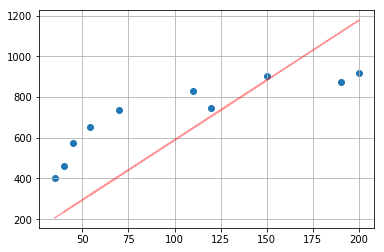

In [14]:
plt.scatter(x, y)

# gradient descent plot without intercept

plt.plot(x, B1*X2, c='r', alpha=0.4)

plt.grid()
plt.show()

! Коэфициент B1 при градиентном спуске такой же как и при матричном поиске. Есдинственное - я не понял что я не так сделал с MSE - функция, вроде, верная, но показатель ошибки при новых итерациях не меняется, к тому же, он довольно высокий.

**В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?**

Таблица Лапласа (Z критерий) используется тогда, когда известна дисперсия или среднеквадратичное отклонение ген совокупности,
в иных случаях используется таблица Стьюдента(t критерий)

**Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

In [0]:
def mse2(B0, B1, x=x, y=y, n=10):
  
  return np.sum((B0 + B1 * x - y)**2) / n

In [24]:
alpha = 1e-5
B1 = 0.1
B0 = 0.1

for i in range(1500000):
  y_pred = B0 + B1 * x
  
  B0 -= alpha * (2/n) * np.sum((y_pred - y))
  B1 -= alpha * (2/n) * np.sum((y_pred - y) * x)
  
  if i % 500000 == 0:
    print(f'Iteration = {i}, B0 = {B0}, B1 = {B1}, mse = {mse2(B0, B1)}')

Iteration = 0, B0 = 0.1139932, B1 = 1.6950780000000003, mse = 298805.38996099564
Iteration = 500000, B0 = 409.0359675710964, B1 = 2.8791950478876815, mse = 6783.669380682817
Iteration = 1000000, B0 = 441.396215664944, B1 = 2.6410093146294247, mse = 6472.376235570253


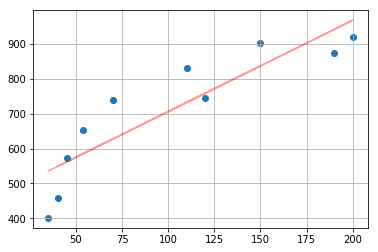

In [25]:
plt.scatter(x, y)

# gradient descent plot with intercept

plt.plot(x, B0 + B1 * x, c='r', alpha=0.4)

plt.grid()
plt.show()